In [110]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [111]:
# Δεδομένα
stackoverflow_data = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None, names=["source_id", "target_id", "timestamp"])

stackoverflow_data.head(5)

,source_id,target_id,timestamp
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [157]:
# Create a small dataset of 100 rows first 50 and last 50
# dataset = pd.concat([stackoverflow_data.iloc[:1000], stackoverflow_data.iloc[-1000:]]) 
dataset = stackoverflow_data.iloc[:1000]

In [158]:
# Υπολογισμός των χρονικών στιγμών t_min, t_max, ΔΤ, δτ
N = int(input('Enter number of time periods:')) # User Input

t_min = dataset.timestamp.min()
t_max = dataset.timestamp.max()

DT = t_max - t_min
dt = DT / N

periodLength = int(len(dataset)/N)

print('Minimum Timestamp = ', t_min, 'Date: ', pd.to_datetime(t_min, unit='s'))
print('Maximum Timestamp = ', t_max, 'Date: ', pd.to_datetime(t_max, unit='s'))
print('DT = ', DT)
print('χρονική διάρκεια: ', dt)


Enter number of time periods:5
Minimum Timestamp =  1217567877 Date:  2008-08-01 05:17:57
Maximum Timestamp =  1218036494 Date:  2008-08-06 15:28:14
DT =  468617
χρονική διάρκεια:  93723.4


In [159]:
# Διαμέριση του συνολικού χρονικού διαστήματος
def create_intervals(dataset,N):
    
    intervals = []
    for j in range(0,N):
        
        #Start of time interval
        tj = t_min + j * dt
        
        #End of time interval
        tj1 = t_min + (j+1) * dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

time_intervals = create_intervals(dataset,N)
# print('Time Intervals: ', time_intervals)

In [160]:
def graph(time_interval):
    min_time, max_time = time_interval
    g = nx.DiGraph()
    df_indexes=[]
    index=0
    while index < len(dataset):
        if min_time <= dataset.timestamp[index] < max_time \
            or ( ( max_time == N-1 and min_time <= dataset.timestamp[index] <= max_time)) \
            and dataset.source_id[index] != dataset.target_id[index]:
            g.add_edge(dataset.source_id[index], dataset.target_id[index])
            df_indexes.append(index) 
        index += 1
    nx.draw_networkx(g, node_size=150, font_size=10)
    plt.show()
    centrality_plots(g)
    # print(dataset.iloc[df_indexes])


In [161]:
def centrality_plots(G):
    
    # Compute the degree centrality:
    degree_centrality = nx.degree_centrality(G)
    # Compute the in degree centrality:
    in_degree_centrality = nx.in_degree_centrality(G)
    # Compute the Out Degree Centrality:
    out_degree_centrality = nx.out_degree_centrality(G)
    # Compute the closeness Centrality: 
    closeness_centrality = nx.closeness_centrality(G)
    # Compute the Betweenness Centrality: 
    betweenness_centrality = nx.betweenness_centrality(G)
    # Compute the Eigenvector Centrality: 
    eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
    # Compute the Katz Centrality: 
    katz_centrality = nx.katz_centrality_numpy(G, max(e).real)
    
    
    # degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

    # Plots 
    fig, axs = plt.subplots(3, 3, figsize=(15,15))

    # Plot a histogram of the degree centrality distribution of the graph.
    degree_centrality_values = np.asarray(list(degree_centrality.values())) 
    axs[0][0].set_ylabel('Relative Frequency')
    axs[0][0].set_title('degree centrality')
    axs[0][0].hist(degree_centrality_values)
    
    # Plot a histogram of the in degree centrality distribution of the graph.
    in_degree_centrality_values = np.asarray(list(in_degree_centrality.values())) 
    axs[0][1].set_title('in degree centrality')
    axs[0][1].hist(in_degree_centrality_values)
    
    # Plot a histogram of the out degree centrality distribution of the graph.
    out_degree_centrality_values = np.asarray(list(out_degree_centrality.values())) 
    axs[0][2].set_title('out degree centrality')
    axs[0][2].hist(out_degree_centrality_values)
    
    # Plot a histogram of the closeness Centrality distribution of the graph
    closeness_centrality_values = np.asarray(list(closeness_centrality.values())) 
    axs[1][0].set_title('Closeness Centrality')
    axs[1][0].hist(closeness_centrality_values)

    # Plot a histogram of the Betweenness Centrality distribution of the graph
    betweenness_centrality_values = np.asarray(list(betweenness_centrality.values())) 
    axs[1][1].set_title('Betweenness Centrality')
    axs[1][1].hist(betweenness_centrality_values)

    # Plot a histogram of the Eigenvector Centrality distribution of the graph
    eigenvector_centrality_value = np.asarray(list(eigenvector_centrality.values())) 
    axs[1][2].set_title('Eigenvector Centrality')
    axs[1][2].hist(eigenvector_centrality_value)

    # Plot a histogram of the Katz Centrality distribution of the graph
    katz_centrality_values = np.asarray(list(katz_centrality.values())) 
    axs[2][0].set_title('Katz Centrality')
    axs[2][0].hist(katz_centrality_values)
    
    plt.show()

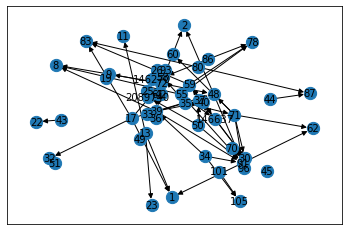

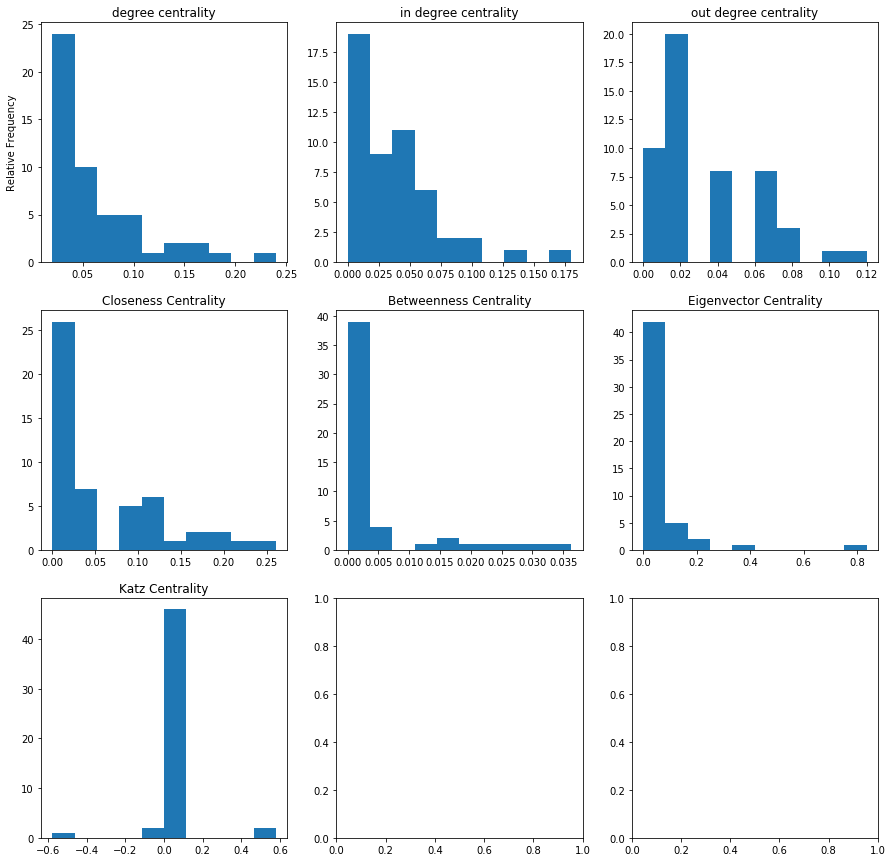

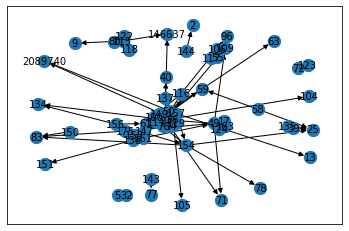

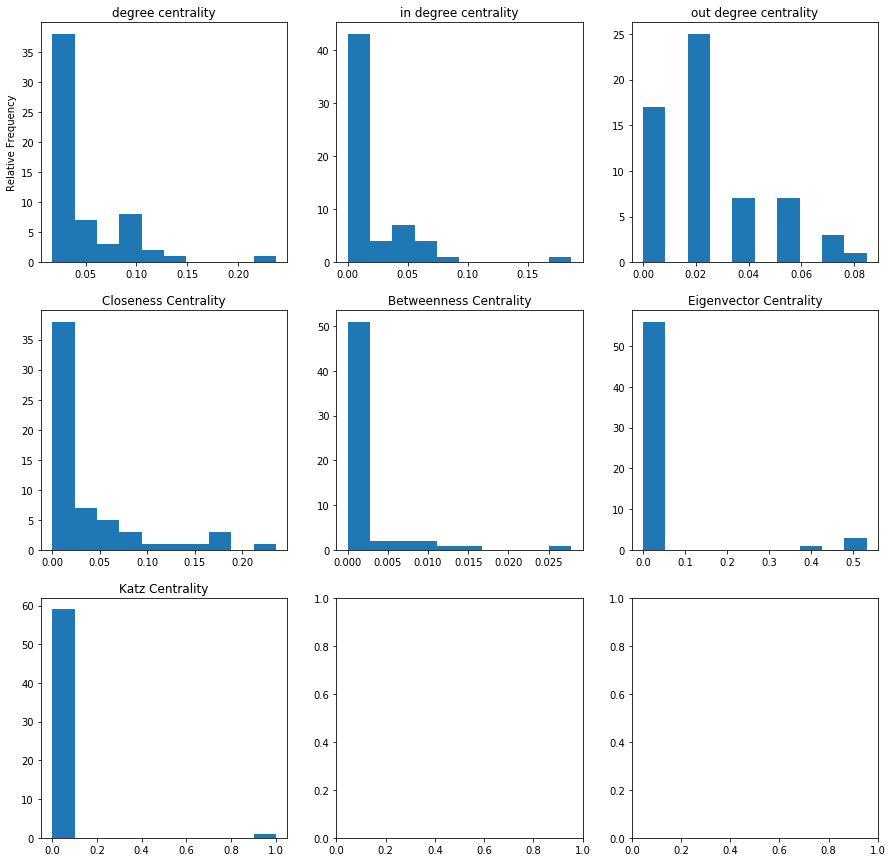

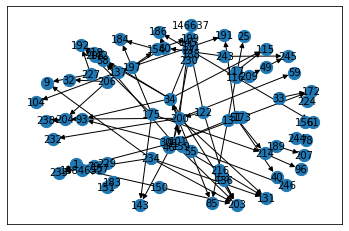

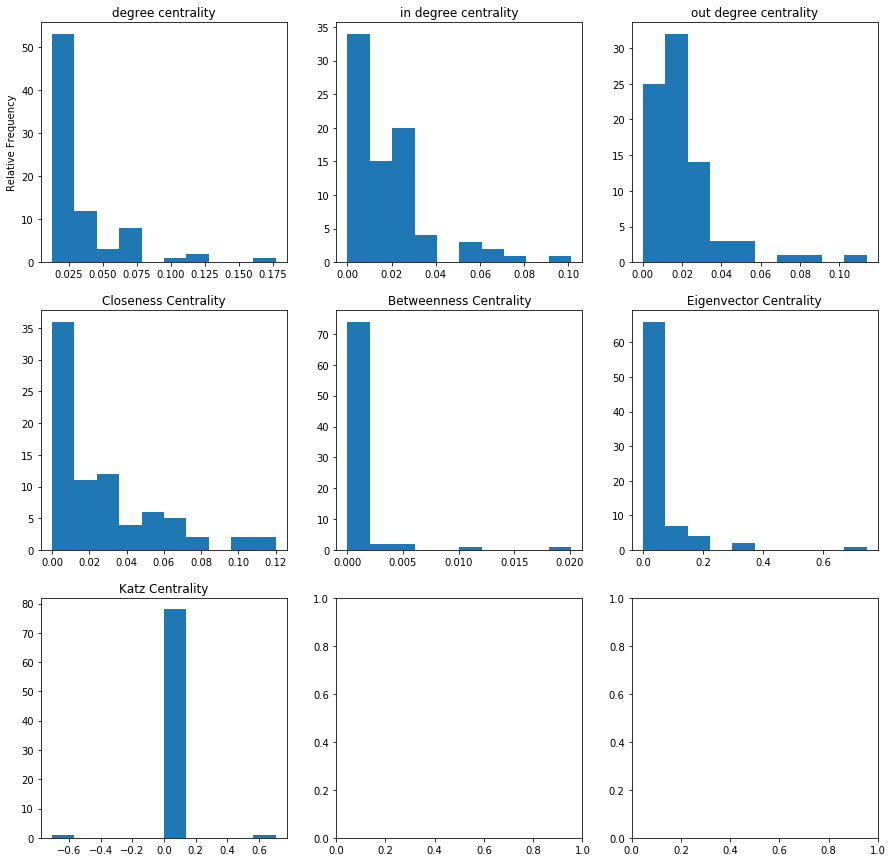

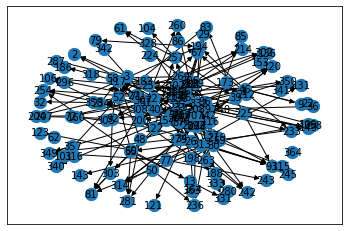

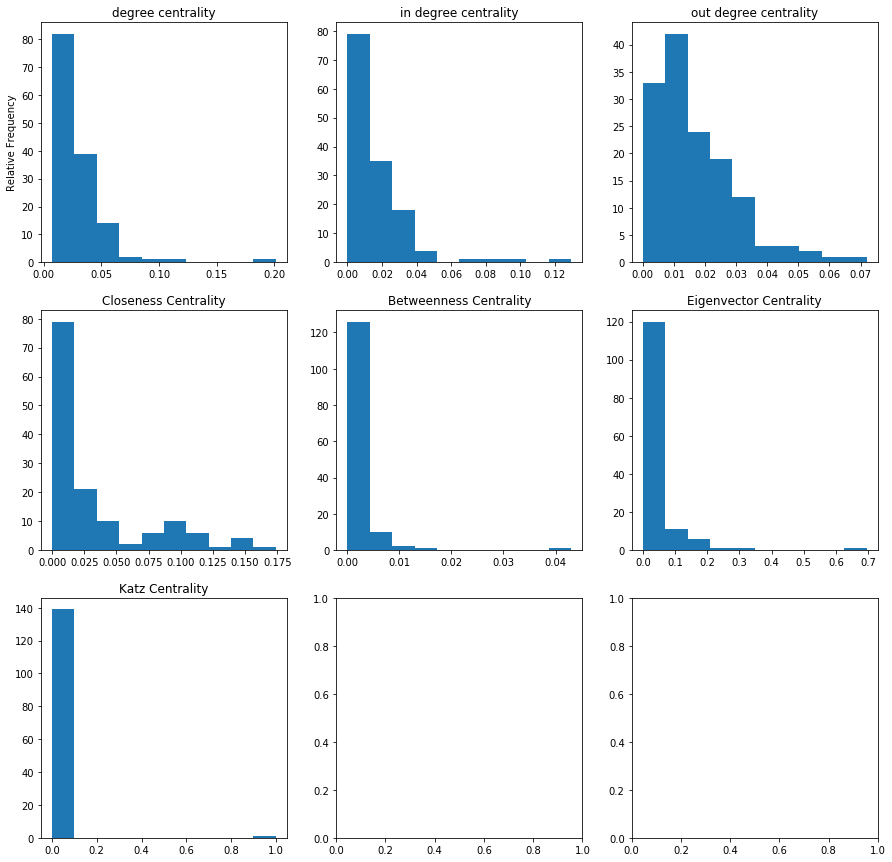

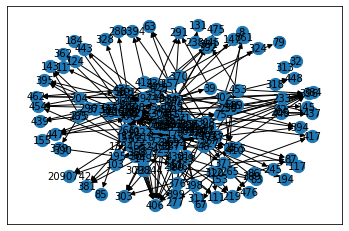

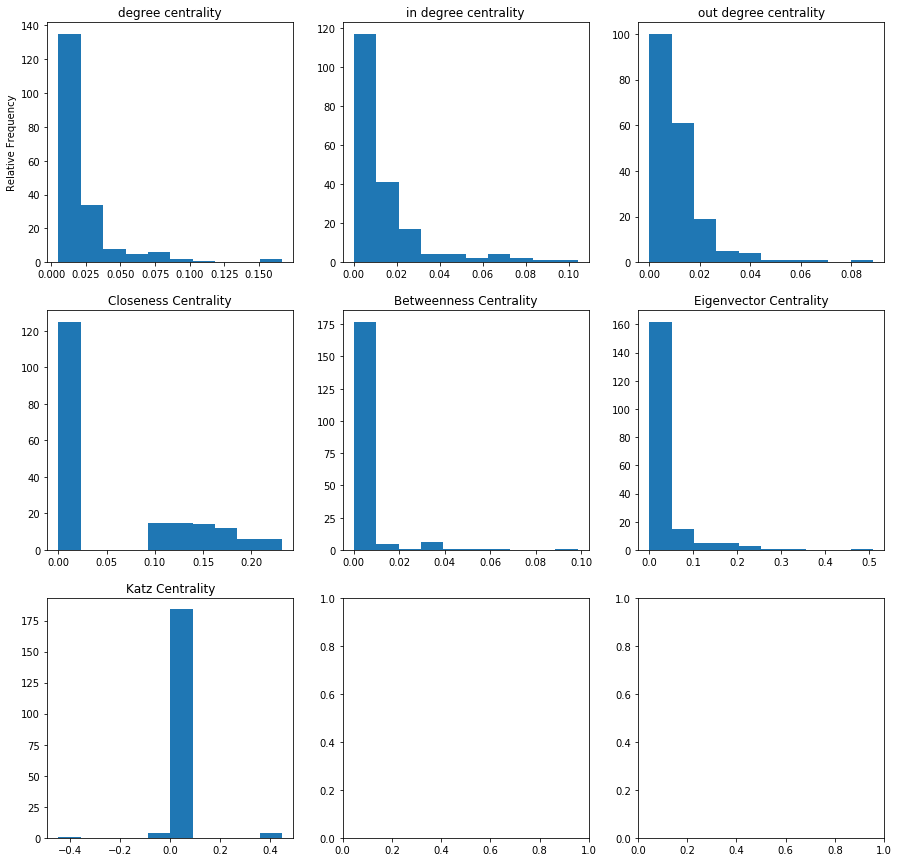

In [162]:
for i in range(len(time_intervals)):
    graph(time_intervals[i])

In [230]:
def salam(t): # Finds V* and E*
    if t < N - 1:
        g1 = nx.DiGraph()
        g2 = nx.DiGraph()
        for index in range(len(dataset)):
            if time_intervals[t][0] <= dataset.timestamp[index] < time_intervals[t][1] \
                and dataset.source_id[index] != dataset.target_id[index]:
                    g1.add_edge(dataset.source_id[index], dataset.target_id[index])
            elif time_intervals[t + 1][0] <= dataset.timestamp[index] < time_intervals[t + 1][1] \
                and dataset.source_id[index] != dataset.target_id[index]:
                    g2.add_edge(dataset.source_id[index], dataset.target_id[index])
        v = []
        e1 = []
        e2 = []
        
        S1=set(g1.nodes)
        S2=set(g2.nodes)
        
        
        for i in g1.nodes: 
            for j in g2.nodes:
                print(i, j)
                if i == j:
                    v.append(i)
                    break
        
 

In [231]:
for i in range(N):
    salam(i)

9 40
9 146637
9 106
9 96
9 91
9 109
9 49
9 71
9 55
9 58
9 59
9 63
9 50
9 61
9 111
9 100
9 5
9 32
9 116
9 115
9 9
8 40
8 146637
8 106
8 96
8 91
8 109
8 49
8 71
8 55
8 58
8 59
8 63
8 50
8 61
8 111
8 100
8 5
8 32
8 116
8 115
8 9
8 119
8 80
8 117
8 122
8 124
8 118
8 134
8 136
8 135
8 25
8 137
8 123
8 72
8 17
8 144
8 2
8 147
8 143
8 77
8 150
8 83
8 153
8 151
8 154
8 156
8 86
8 2089740
8 104
8 157
8 13
8 105
8 161
8 78
8 163
8 39
8 149
8 34
8 76
8 175
13 40
13 146637
13 106
13 96
13 91
13 109
13 49
13 71
13 55
13 58
13 59
13 63
13 50
13 61
13 111
13 100
13 5
13 32
13 116
13 115
13 9
13 119
13 80
13 117
13 122
13 124
13 118
13 134
13 136
13 135
13 25
13 137
13 123
13 72
13 17
13 144
13 2
13 147
13 143
13 77
13 150
13 83
13 153
13 151
13 154
13 156
13 86
13 2089740
13 104
13 157
13 13
1 40
1 146637
1 106
1 96
1 91
1 109
1 49
1 71
1 55
1 58
1 59
1 63
1 50
1 61
1 111
1 100
1 5
1 32
1 116
1 115
1 9
1 119
1 80
1 117
1 122
1 124
1 118
1 134
1 136
1 135
1 25
1 137
1 123
1 72
1 17
1 144
1 2
1 147
1 1

86 71
86 55
86 58
86 59
86 63
86 50
86 61
86 111
86 100
86 5
86 32
86 116
86 115
86 9
86 119
86 80
86 117
86 122
86 124
86 118
86 134
86 136
86 135
86 25
86 137
86 123
86 72
86 17
86 144
86 2
86 147
86 143
86 77
86 150
86 83
86 153
86 151
86 154
86 156
86 86
146637 40
146637 146637
30 40
30 146637
30 106
30 96
30 91
30 109
30 49
30 71
30 55
30 58
30 59
30 63
30 50
30 61
30 111
30 100
30 5
30 32
30 116
30 115
30 9
30 119
30 80
30 117
30 122
30 124
30 118
30 134
30 136
30 135
30 25
30 137
30 123
30 72
30 17
30 144
30 2
30 147
30 143
30 77
30 150
30 83
30 153
30 151
30 154
30 156
30 86
30 2089740
30 104
30 157
30 13
30 105
30 161
30 78
30 163
30 39
30 149
30 34
30 76
30 175
80 40
80 146637
80 106
80 96
80 91
80 109
80 49
80 71
80 55
80 58
80 59
80 63
80 50
80 61
80 111
80 100
80 5
80 32
80 116
80 115
80 9
80 119
80 80
87 40
87 146637
87 106
87 96
87 91
87 109
87 49
87 71
87 55
87 58
87 59
87 63
87 50
87 61
87 111
87 100
87 5
87 32
87 116
87 115
87 9
87 119
87 80
87 117
87 122
87 124
87 11

119 46
119 27
119 216
119 205
119 192
119 145
119 58
119 219
119 142
119 214
119 96
119 175
119 157
119 79
119 150
119 1384652
119 229
119 189
119 207
119 227
119 9
119 230
119 234
119 233
119 101
119 60
119 186
119 93
119 238
119 203
119 159
119 153
119 131
119 232
119 243
119 137
119 55
119 116
119 246
119 244
119 78
119 245
119 1
119 85
80 156
80 61
80 13
80 25
80 173
80 172
80 183
80 151
80 154
80 184
80 122
80 136
80 33
80 188
80 111
80 91
80 143
80 197
80 191
80 104
80 117
80 115
80 199
80 146637
80 51
80 40
80 200
80 59
80 34
80 209
80 49
80 206
80 32
80 30
80 204
80 46
80 27
80 216
80 205
80 192
80 145
80 58
80 219
80 142
80 214
80 96
80 175
80 157
80 79
80 150
80 1384652
80 229
80 189
80 207
80 227
80 9
80 230
80 234
80 233
80 101
80 60
80 186
80 93
80 238
80 203
80 159
80 153
80 131
80 232
80 243
80 137
80 55
80 116
80 246
80 244
80 78
80 245
80 1
80 85
117 156
117 61
117 13
117 25
117 173
117 172
117 183
117 151
117 154
117 184
117 122
117 136
117 33
117 188
117 111
117 91
1

86 230
86 234
86 233
86 101
86 60
86 186
86 93
86 238
86 203
86 159
86 153
86 131
86 232
86 243
86 137
86 55
86 116
86 246
86 244
86 78
86 245
86 1
86 85
2089740 156
2089740 61
2089740 13
2089740 25
2089740 173
2089740 172
2089740 183
2089740 151
2089740 154
2089740 184
2089740 122
2089740 136
2089740 33
2089740 188
2089740 111
2089740 91
2089740 143
2089740 197
2089740 191
2089740 104
2089740 117
2089740 115
2089740 199
2089740 146637
2089740 51
2089740 40
2089740 200
2089740 59
2089740 34
2089740 209
2089740 49
2089740 206
2089740 32
2089740 30
2089740 204
2089740 46
2089740 27
2089740 216
2089740 205
2089740 192
2089740 145
2089740 58
2089740 219
2089740 142
2089740 214
2089740 96
2089740 175
2089740 157
2089740 79
2089740 150
2089740 1384652
2089740 229
2089740 189
2089740 207
2089740 227
2089740 9
2089740 230
2089740 234
2089740 233
2089740 101
2089740 60
2089740 186
2089740 93
2089740 238
2089740 203
2089740 159
2089740 153
2089740 131
2089740 232
2089740 243
2089740 137
2089740 

154 77
154 243
154 116
154 87
154 46
154 55
154 254
154 227
154 2
154 234
154 13
154 3
154 85
154 257
154 104
154 122
154 67
154 236
154 2090742
154 86
154 260
154 51
154 39
154 40
154 267
154 268
154 9
154 200
154 188
154 264
154 263
154 120
154 275
154 266
154 280
154 206
154 60
154 281
154 34
154 25
154 192
154 258
154 61
154 48
154 173
154 149
154 230
154 30
154 292
154 194
154 35
154 121
154 216
154 302
154 312
154 2089740
154 83
154 313
154 109
154 29
154 17
154 199
154 136
154 269
154 314
154 26
154 212
154 225
154 58
154 70
154 172
154 71
154 1384652
154 287
154 45
154 123
154 307
154 106
154 304
154 333
154 331
154 198
154 296
154 305
154 92
154 214
154 59
154 143
154 96
154 332
154 153
154 117
154 341
154 131
154 271
154 102
154 52
154 318
154 186
154 224
154 328
154 204
154 27
154 72
154 207
154 308
154 340
154 316
154 350
154 101
154 183
154 303
154 137
154 349
154 219
154 164
154 32
154 157
154 357
154 358
154 205
154 36
154 242
154 50
154 160
154 81
154 363
154 115
154 5


34 2
34 234
34 13
34 3
34 85
34 257
34 104
34 122
34 67
34 236
34 2090742
34 86
34 260
34 51
34 39
34 40
34 267
34 268
34 9
34 200
34 188
34 264
34 263
34 120
34 275
34 266
34 280
34 206
34 60
34 281
34 34
209 1
209 233
209 93
209 245
209 231
209 91
209 77
209 243
209 116
209 87
209 46
209 55
209 254
209 227
209 2
209 234
209 13
209 3
209 85
209 257
209 104
209 122
209 67
209 236
209 2090742
209 86
209 260
209 51
209 39
209 40
209 267
209 268
209 9
209 200
209 188
209 264
209 263
209 120
209 275
209 266
209 280
209 206
209 60
209 281
209 34
209 25
209 192
209 258
209 61
209 48
209 173
209 149
209 230
209 30
209 292
209 194
209 35
209 121
209 216
209 302
209 312
209 2089740
209 83
209 313
209 109
209 29
209 17
209 199
209 136
209 269
209 314
209 26
209 212
209 225
209 58
209 70
209 172
209 71
209 1384652
209 287
209 45
209 123
209 307
209 106
209 304
209 333
209 331
209 198
209 296
209 305
209 92
209 214
209 59
209 143
209 96
209 332
209 153
209 117
209 341
209 131
209 271
209 102
209 5

214 236
214 2090742
214 86
214 260
214 51
214 39
214 40
214 267
214 268
214 9
214 200
214 188
214 264
214 263
214 120
214 275
214 266
214 280
214 206
214 60
214 281
214 34
214 25
214 192
214 258
214 61
214 48
214 173
214 149
214 230
214 30
214 292
214 194
214 35
214 121
214 216
214 302
214 312
214 2089740
214 83
214 313
214 109
214 29
214 17
214 199
214 136
214 269
214 314
214 26
214 212
214 225
214 58
214 70
214 172
214 71
214 1384652
214 287
214 45
214 123
214 307
214 106
214 304
214 333
214 331
214 198
214 296
214 305
214 92
214 214
96 1
96 233
96 93
96 245
96 231
96 91
96 77
96 243
96 116
96 87
96 46
96 55
96 254
96 227
96 2
96 234
96 13
96 3
96 85
96 257
96 104
96 122
96 67
96 236
96 2090742
96 86
96 260
96 51
96 39
96 40
96 267
96 268
96 9
96 200
96 188
96 264
96 263
96 120
96 275
96 266
96 280
96 206
96 60
96 281
96 34
96 25
96 192
96 258
96 61
96 48
96 173
96 149
96 230
96 30
96 292
96 194
96 35
96 121
96 216
96 302
96 312
96 2089740
96 83
96 313
96 109
96 29
96 17
96 199
96 13

238 46
238 55
238 254
238 227
238 2
238 234
238 13
238 3
238 85
238 257
238 104
238 122
238 67
238 236
238 2090742
238 86
238 260
238 51
238 39
238 40
238 267
238 268
238 9
238 200
238 188
238 264
238 263
238 120
238 275
238 266
238 280
238 206
238 60
238 281
238 34
238 25
238 192
238 258
238 61
238 48
238 173
238 149
238 230
238 30
238 292
238 194
238 35
238 121
238 216
238 302
238 312
238 2089740
238 83
238 313
238 109
238 29
238 17
238 199
238 136
238 269
238 314
238 26
238 212
238 225
238 58
238 70
238 172
238 71
238 1384652
238 287
238 45
238 123
238 307
238 106
238 304
238 333
238 331
238 198
238 296
238 305
238 92
238 214
238 59
238 143
238 96
238 332
238 153
238 117
238 341
238 131
238 271
238 102
238 52
238 318
238 186
238 224
238 328
238 204
238 27
238 72
238 207
238 308
238 340
238 316
238 350
238 101
238 183
238 303
238 137
238 349
238 219
238 164
238 32
238 157
238 357
238 358
238 205
238 36
238 242
238 50
238 160
238 81
238 363
238 115
238 5
238 79
238 342
238 22
203 1
20

1 269
1 116
1 122
1 2090742
1 227
1 195
1 51
1 192
1 5
1 232
1 198
1 48
1 194
1 342
1 63
1 370
1 298
1 91
1 137
1 46
1 369
1 332
1 358
1 266
1 372
1 200
1 188
1 371
1 67
1 377
1 117
1 259
1 364
1 307
1 383
1 95
1 11
1 230
1 83
1 389
1 120
1 193
1 87
1 373
1 296
1 136
1 340
1 267
1 380
1 34
1 72
1 287
1 246
1 396
1 58
1 17
1 395
1 304
1 384
1 40
1 26
1 156
1 402
1 25
1 111
1 33
1 225
1 379
1 106
1 149
1 394
1 390
1 140
1 410
1 245
1 170
1 35
1 409
1 39
1 121
1 414
1 3394
1 404
1 143
1 71
1 275
1 309844
1 316
1 311
1 2089740
1 79
1 305
1 398
1 152
1 277
1 399
1 312
1 303
1 27
1 422
1 350
1 157
1 1384652
1 428
1 417
1 308
1 341
1 77
1 30
1 55
1 50
1 285
1 238
1 131
1 431
1 434
1 406
1 423
1 357
1 327
1 432
1 45
1 199
1 36
1 224
1 92
1 435
1 415
1 184
1 75
1 443
1 306
1 289
1 447
1 444
1 446
1 8
1 237
1 328
1 437
1 234
1 429
1 448
1 318
1 271
1 419
1 449
1 453
1 216
1 274
1 233
1 206
1 360
1 42
1 99
1 381
1 455
1 454
1 457
1 376
1 103
1 85
1 124
1 362
1 204
1 145
1 861
1 324
1 313
1 32
1 4

2 392
2 147
2 462
2 101
2 430
2 219
2 363
2 153
2 291
2 280
2 86
2 278
2 445
2 475
2 476
2 265
234 269
234 116
234 122
234 2090742
234 227
234 195
234 51
234 192
234 5
234 232
234 198
234 48
234 194
234 342
234 63
234 370
234 298
234 91
234 137
234 46
234 369
234 332
234 358
234 266
234 372
234 200
234 188
234 371
234 67
234 377
234 117
234 259
234 364
234 307
234 383
234 95
234 11
234 230
234 83
234 389
234 120
234 193
234 87
234 373
234 296
234 136
234 340
234 267
234 380
234 34
234 72
234 287
234 246
234 396
234 58
234 17
234 395
234 304
234 384
234 40
234 26
234 156
234 402
234 25
234 111
234 33
234 225
234 379
234 106
234 149
234 394
234 390
234 140
234 410
234 245
234 170
234 35
234 409
234 39
234 121
234 414
234 3394
234 404
234 143
234 71
234 275
234 309844
234 316
234 311
234 2089740
234 79
234 305
234 398
234 152
234 277
234 399
234 312
234 303
234 27
234 422
234 350
234 157
234 1384652
234 428
234 417
234 308
234 341
234 77
234 30
234 55
234 50
234 285
234 238
234 131
234 43

260 274
260 233
260 206
260 360
260 42
260 99
260 381
260 455
260 454
260 457
260 376
260 103
260 85
260 124
260 362
260 204
260 145
260 861
260 324
260 313
260 32
260 459
260 49
260 100
260 155
260 391
260 468
260 439
260 392
260 147
260 462
260 101
260 430
260 219
260 363
260 153
260 291
260 280
260 86
260 278
260 445
260 475
260 476
260 265
51 269
51 116
51 122
51 2090742
51 227
51 195
51 51
39 269
39 116
39 122
39 2090742
39 227
39 195
39 51
39 192
39 5
39 232
39 198
39 48
39 194
39 342
39 63
39 370
39 298
39 91
39 137
39 46
39 369
39 332
39 358
39 266
39 372
39 200
39 188
39 371
39 67
39 377
39 117
39 259
39 364
39 307
39 383
39 95
39 11
39 230
39 83
39 389
39 120
39 193
39 87
39 373
39 296
39 136
39 340
39 267
39 380
39 34
39 72
39 287
39 246
39 396
39 58
39 17
39 395
39 304
39 384
39 40
39 26
39 156
39 402
39 25
39 111
39 33
39 225
39 379
39 106
39 149
39 394
39 390
39 140
39 410
39 245
39 170
39 35
39 409
39 39
40 269
40 116
40 122
40 2090742
40 227
40 195
40 51
40 192
40 5
40 

60 259
60 364
60 307
60 383
60 95
60 11
60 230
60 83
60 389
60 120
60 193
60 87
60 373
60 296
60 136
60 340
60 267
60 380
60 34
60 72
60 287
60 246
60 396
60 58
60 17
60 395
60 304
60 384
60 40
60 26
60 156
60 402
60 25
60 111
60 33
60 225
60 379
60 106
60 149
60 394
60 390
60 140
60 410
60 245
60 170
60 35
60 409
60 39
60 121
60 414
60 3394
60 404
60 143
60 71
60 275
60 309844
60 316
60 311
60 2089740
60 79
60 305
60 398
60 152
60 277
60 399
60 312
60 303
60 27
60 422
60 350
60 157
60 1384652
60 428
60 417
60 308
60 341
60 77
60 30
60 55
60 50
60 285
60 238
60 131
60 431
60 434
60 406
60 423
60 357
60 327
60 432
60 45
60 199
60 36
60 224
60 92
60 435
60 415
60 184
60 75
60 443
60 306
60 289
60 447
60 444
60 446
60 8
60 237
60 328
60 437
60 234
60 429
60 448
60 318
60 271
60 419
60 449
60 453
60 216
60 274
60 233
60 206
60 360
60 42
60 99
60 381
60 455
60 454
60 457
60 376
60 103
60 85
60 124
60 362
60 204
60 145
60 861
60 324
60 313
60 32
60 459
60 49
60 100
60 155
60 391
60 468
60 43

121 380
121 34
121 72
121 287
121 246
121 396
121 58
121 17
121 395
121 304
121 384
121 40
121 26
121 156
121 402
121 25
121 111
121 33
121 225
121 379
121 106
121 149
121 394
121 390
121 140
121 410
121 245
121 170
121 35
121 409
121 39
121 121
216 269
216 116
216 122
216 2090742
216 227
216 195
216 51
216 192
216 5
216 232
216 198
216 48
216 194
216 342
216 63
216 370
216 298
216 91
216 137
216 46
216 369
216 332
216 358
216 266
216 372
216 200
216 188
216 371
216 67
216 377
216 117
216 259
216 364
216 307
216 383
216 95
216 11
216 230
216 83
216 389
216 120
216 193
216 87
216 373
216 296
216 136
216 340
216 267
216 380
216 34
216 72
216 287
216 246
216 396
216 58
216 17
216 395
216 304
216 384
216 40
216 26
216 156
216 402
216 25
216 111
216 33
216 225
216 379
216 106
216 149
216 394
216 390
216 140
216 410
216 245
216 170
216 35
216 409
216 39
216 121
216 414
216 3394
216 404
216 143
216 71
216 275
216 309844
216 316
216 311
216 2089740
216 79
216 305
216 398
216 152
216 277
216 39

212 51
212 192
212 5
212 232
212 198
212 48
212 194
212 342
212 63
212 370
212 298
212 91
212 137
212 46
212 369
212 332
212 358
212 266
212 372
212 200
212 188
212 371
212 67
212 377
212 117
212 259
212 364
212 307
212 383
212 95
212 11
212 230
212 83
212 389
212 120
212 193
212 87
212 373
212 296
212 136
212 340
212 267
212 380
212 34
212 72
212 287
212 246
212 396
212 58
212 17
212 395
212 304
212 384
212 40
212 26
212 156
212 402
212 25
212 111
212 33
212 225
212 379
212 106
212 149
212 394
212 390
212 140
212 410
212 245
212 170
212 35
212 409
212 39
212 121
212 414
212 3394
212 404
212 143
212 71
212 275
212 309844
212 316
212 311
212 2089740
212 79
212 305
212 398
212 152
212 277
212 399
212 312
212 303
212 27
212 422
212 350
212 157
212 1384652
212 428
212 417
212 308
212 341
212 77
212 30
212 55
212 50
212 285
212 238
212 131
212 431
212 434
212 406
212 423
212 357
212 327
212 432
212 45
212 199
212 36
212 224
212 92
212 435
212 415
212 184
212 75
212 443
212 306
212 289
212 4

331 149
331 394
331 390
331 140
331 410
331 245
331 170
331 35
331 409
331 39
331 121
331 414
331 3394
331 404
331 143
331 71
331 275
331 309844
331 316
331 311
331 2089740
331 79
331 305
331 398
331 152
331 277
331 399
331 312
331 303
331 27
331 422
331 350
331 157
331 1384652
331 428
331 417
331 308
331 341
331 77
331 30
331 55
331 50
331 285
331 238
331 131
331 431
331 434
331 406
331 423
331 357
331 327
331 432
331 45
331 199
331 36
331 224
331 92
331 435
331 415
331 184
331 75
331 443
331 306
331 289
331 447
331 444
331 446
331 8
331 237
331 328
331 437
331 234
331 429
331 448
331 318
331 271
331 419
331 449
331 453
331 216
331 274
331 233
331 206
331 360
331 42
331 99
331 381
331 455
331 454
331 457
331 376
331 103
331 85
331 124
331 362
331 204
331 145
331 861
331 324
331 313
331 32
331 459
331 49
331 100
331 155
331 391
331 468
331 439
331 392
331 147
331 462
331 101
331 430
331 219
331 363
331 153
331 291
331 280
331 86
331 278
331 445
331 475
331 476
331 265
198 269
198 116
1

271 83
271 389
271 120
271 193
271 87
271 373
271 296
271 136
271 340
271 267
271 380
271 34
271 72
271 287
271 246
271 396
271 58
271 17
271 395
271 304
271 384
271 40
271 26
271 156
271 402
271 25
271 111
271 33
271 225
271 379
271 106
271 149
271 394
271 390
271 140
271 410
271 245
271 170
271 35
271 409
271 39
271 121
271 414
271 3394
271 404
271 143
271 71
271 275
271 309844
271 316
271 311
271 2089740
271 79
271 305
271 398
271 152
271 277
271 399
271 312
271 303
271 27
271 422
271 350
271 157
271 1384652
271 428
271 417
271 308
271 341
271 77
271 30
271 55
271 50
271 285
271 238
271 131
271 431
271 434
271 406
271 423
271 357
271 327
271 432
271 45
271 199
271 36
271 224
271 92
271 435
271 415
271 184
271 75
271 443
271 306
271 289
271 447
271 444
271 446
271 8
271 237
271 328
271 437
271 234
271 429
271 448
271 318
271 271
102 269
102 116
102 122
102 2090742
102 227
102 195
102 51
102 192
102 5
102 232
102 198
102 48
102 194
102 342
102 63
102 370
102 298
102 91
102 137
102 46


308 136
308 340
308 267
308 380
308 34
308 72
308 287
308 246
308 396
308 58
308 17
308 395
308 304
308 384
308 40
308 26
308 156
308 402
308 25
308 111
308 33
308 225
308 379
308 106
308 149
308 394
308 390
308 140
308 410
308 245
308 170
308 35
308 409
308 39
308 121
308 414
308 3394
308 404
308 143
308 71
308 275
308 309844
308 316
308 311
308 2089740
308 79
308 305
308 398
308 152
308 277
308 399
308 312
308 303
308 27
308 422
308 350
308 157
308 1384652
308 428
308 417
308 308
340 269
340 116
340 122
340 2090742
340 227
340 195
340 51
340 192
340 5
340 232
340 198
340 48
340 194
340 342
340 63
340 370
340 298
340 91
340 137
340 46
340 369
340 332
340 358
340 266
340 372
340 200
340 188
340 371
340 67
340 377
340 117
340 259
340 364
340 307
340 383
340 95
340 11
340 230
340 83
340 389
340 120
340 193
340 87
340 373
340 296
340 136
340 340
316 269
316 116
316 122
316 2090742
316 227
316 195
316 51
316 192
316 5
316 232
316 198
316 48
316 194
316 342
316 63
316 370
316 298
316 91
316

157 152
157 277
157 399
157 312
157 303
157 27
157 422
157 350
157 157
357 269
357 116
357 122
357 2090742
357 227
357 195
357 51
357 192
357 5
357 232
357 198
357 48
357 194
357 342
357 63
357 370
357 298
357 91
357 137
357 46
357 369
357 332
357 358
357 266
357 372
357 200
357 188
357 371
357 67
357 377
357 117
357 259
357 364
357 307
357 383
357 95
357 11
357 230
357 83
357 389
357 120
357 193
357 87
357 373
357 296
357 136
357 340
357 267
357 380
357 34
357 72
357 287
357 246
357 396
357 58
357 17
357 395
357 304
357 384
357 40
357 26
357 156
357 402
357 25
357 111
357 33
357 225
357 379
357 106
357 149
357 394
357 390
357 140
357 410
357 245
357 170
357 35
357 409
357 39
357 121
357 414
357 3394
357 404
357 143
357 71
357 275
357 309844
357 316
357 311
357 2089740
357 79
357 305
357 398
357 152
357 277
357 399
357 312
357 303
357 27
357 422
357 350
357 157
357 1384652
357 428
357 417
357 308
357 341
357 77
357 30
357 55
357 50
357 285
357 238
357 131
357 431
357 434
357 406
357 42

115 454
115 457
115 376
115 103
115 85
115 124
115 362
115 204
115 145
115 861
115 324
115 313
115 32
115 459
115 49
115 100
115 155
115 391
115 468
115 439
115 392
115 147
115 462
115 101
115 430
115 219
115 363
115 153
115 291
115 280
115 86
115 278
115 445
115 475
115 476
115 265
5 269
5 116
5 122
5 2090742
5 227
5 195
5 51
5 192
5 5
79 269
79 116
79 122
79 2090742
79 227
79 195
79 51
79 192
79 5
79 232
79 198
79 48
79 194
79 342
79 63
79 370
79 298
79 91
79 137
79 46
79 369
79 332
79 358
79 266
79 372
79 200
79 188
79 371
79 67
79 377
79 117
79 259
79 364
79 307
79 383
79 95
79 11
79 230
79 83
79 389
79 120
79 193
79 87
79 373
79 296
79 136
79 340
79 267
79 380
79 34
79 72
79 287
79 246
79 396
79 58
79 17
79 395
79 304
79 384
79 40
79 26
79 156
79 402
79 25
79 111
79 33
79 225
79 379
79 106
79 149
79 394
79 390
79 140
79 410
79 245
79 170
79 35
79 409
79 39
79 121
79 414
79 3394
79 404
79 143
79 71
79 275
79 309844
79 316
79 311
79 2089740
79 79
342 269
342 116
342 122
342 2090742
